# Problem Statement

**To Predict the sales price of each house.**

## Business Objective:

**This project implements a machine learning solution that analyze the various house dimesnsions to predict sales price,
helping stakeholders to make data-driven decisions.**

## Goal Setting:

In today's dynamic real estate market, accurate house sales price prediction is crucial for various stakeholders:

- **Home Buyers** : want to ensure they're making fair offer.
- **Real Estate Agent** : Need realiable price estimate to advise client effectively.
- **Investors** : Require accurate valuation for investment decisions.
- **Sellers** : Need to set competitive listing price.

# Import Libraries

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import sidetable

## Display Setting 

In [2]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

## Data Ingestion & Basic Understanding

In [3]:
path = Path.cwd().parent
files = []
for i in path.rglob('*.csv*'):
    files.append(i)
    print(i.name)
    print(files.index(i),' ',i)


sample_submission.csv
0   e:\house_price_prediction\Real-Estate-Price-Prediction\data\raw\extracted\sample_submission.csv
test.csv
1   e:\house_price_prediction\Real-Estate-Price-Prediction\data\raw\extracted\test.csv
train.csv
2   e:\house_price_prediction\Real-Estate-Price-Prediction\data\raw\extracted\train.csv


In [4]:
df_test = pd.read_csv(files[1])
df_test.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal


In [5]:
df_train = pd.read_csv(files[2])
df_train.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


In [6]:
df_train.tail(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,NaN,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [7]:
df_train.sample()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
519,520,70,RL,53.0,10918,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1926,2004,Gambrel,CompShg,MetalSd,MetalSd,NaN,0.0,Gd,TA,BrkTil,Gd,TA,No,Unf,0,Unf,0,1276,1276,GasA,Ex,Y,SBrkr,1276,804,0,2080,0,0,1,1,3,1,Gd,9,Typ,2,Gd,Detchd,1926.0,Unf,1,282,TA,TA,Y,0,0,0,0,145,0,NaN,MnPrv,NaN,0,6,2009,WD,Normal,234000


In [8]:
df_train.shape
print('Number of rows :', df_train.shape[0])
print('Number of columns :', df_train.shape[1])

Number of rows : 1460
Number of columns : 81


In [9]:
# remove whitespace from columns
df_train.columns = df_train.columns.str.strip()

df_test.columns = df_test.columns.str.strip()

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

The data was collected by De Cock where 81 dimensions were recorded for 1460 properties in Ames IA.

Brief description of columns:

- **SalePrice** - the property's sale price in dollars. This is the target variable that you're trying to predict.

- **MSSubClass**: The building class

- **MSZoning**: The general zoning classification

- **LotFrontage**: Linear feet of street connected to property

- **LotArea**: Lot size in square feet

- **Street**: Type of road access

- **Alley**: Type of alley access

- **LotShape**: General shape of property

- **LandContour**: Flatness of the property

- **Utilities**: Type of utilities available

- **LotConfig**: Lot configuration

- **LandSlope**: Slope of property

- **Neighborhood**: Physical locations within Ames city limits

- **Condition1**: Proximity to main road or railroad

- **Condition2**: Proximity to main road or railroad (if a second is present)

- **BldgType**: Type of dwelling

- **HouseStyle**: Style of dwelling

- **OverallQual**: Overall material and finish quality

- **OverallCond**: Overall condition rating

- **YearBuilt**: Original construction date

- **YearRemodAdd**: Remodel date

- **RoofStyle**: Type of roof

- **RoofMatl**: Roof material

- **Exterior1st**: Exterior covering on house

- **Exterior2nd**: Exterior covering on house (if more than one material)

- **MasVnrType**: Masonry veneer type

- **MasVnrArea**: Masonry veneer area in square feet

- **ExterQual**: Exterior material quality

- **ExterCond**: Present condition of the material on the exterior

- **Foundation**: Type of foundation

- BsmtQual: Height of the basement

- BsmtCond: General condition of the basement

- BsmtExposure: Walkout or garden level basement walls

- BsmtFinType1: Quality of basement finished area

- BsmtFinSF1: Type 1 finished square feet

- BsmtFinType2: Quality of second finished area (if present)

- BsmtFinSF2: Type 2 finished square feet

- BsmtUnfSF: Unfinished square feet of basement area

- TotalBsmtSF: Total square feet of basement area

- Heating: Type of heating

- HeatingQC: Heating quality and condition

- CentralAir: Central air conditioning

- Electrical: Electrical system

- 1stFlrSF: First Floor square feet

- 2ndFlrSF: Second floor square feet

- LowQualFinSF: Low quality finished square feet (all floors)

- GrLivArea: Above grade (ground) living area square feet

- BsmtFullBath: Basement full bathrooms

- BsmtHalfBath: Basement half bathrooms

- FullBath: Full bathrooms above grade

- HalfBath: Half baths above grade

- Bedroom: Number of bedrooms above basement level

- Kitchen: Number of kitchens

- KitchenQual: Kitchen quality

- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

- Functional: Home functionality rating

- Fireplaces: Number of fireplaces

- FireplaceQu: Fireplace quality

- GarageType: Garage location

- GarageYrBlt: Year garage was built

- GarageFinish: Interior finish of the garage

- GarageCars: Size of garage in car capacity

- GarageArea: Size of garage in square feet

- GarageQual: Garage quality

- GarageCond: Garage condition

- PavedDrive: Paved driveway

- WoodDeckSF: Wood deck area in square feet

- OpenPorchSF: Open porch area in square feet

- EnclosedPorch: Enclosed porch area in square feet

- 3SsnPorch: Three season porch area in square feet

- ScreenPorch: Screen porch area in square feet

- PoolArea: Pool area in square feet

- PoolQC: Pool quality

- Fence: Fence quality

- MiscFeature: Miscellaneous feature not covered in other categories

- MiscVal: $Value of miscellaneous feature

- MoSold: Month Sold

- YrSold: Year Sold

- SaleType: Type of sale

- SaleCondition: Condition of sale

**This dataset represents the sale of  residential properties in Ames, Iowa, where every single record represents a sale of individual house.
There are 23 nominal, 23 ordinal, 14 discrete, and 20 continuous features describing each house’s size, quality, area, age, and other miscellaneous attributes.
The data spans from 2006 to 2010.**

**Columns Formatting and Consistency**

In [11]:
data_dtype = pd.DataFrame(index=df_train.columns, columns=['Dtype','nunique','unique'])
data_dtype['Dtype'] = df_train.dtypes
data_dtype['nunique'] = df_train.nunique()
data_dtype['unique'] = [df_train[col].unique() for col in df_train.columns]
data_dtype

,Dtype,nunique,unique
Id,int64,1460,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
MSSubClass,int64,15,"[60, 20, 70, 50, 190, 45, 90, 120, 30, 85, 80,..."
MSZoning,object,5,"[RL, RM, C (all), FV, RH]"
LotFrontage,float64,110,"[65.0, 80.0, 68.0, 60.0, 84.0, 85.0, 75.0, nan..."
LotArea,int64,1073,"[8450, 9600, 11250, 9550, 14260, 14115, 10084,..."
Street,object,2,"[Pave, Grvl]"
Alley,object,2,"[nan, Grvl, Pave]"
LotShape,object,4,"[Reg, IR1, IR2, IR3]"
LandContour,object,4,"[Lvl, Bnk, Low, HLS]"
Utilities,object,2,"[AllPub, NoSeWa]"


## Univariate & Multivariate Feature Relationships

In [12]:
## columns with different unique values
file = []
for col in df_train.columns:
    if (df_train[col].nunique() == len(df_train)) | (df_train[col].nunique() >= .90 * len(df_train)):
        file.append(col)
    
file

['Id']

In [13]:
X, y = (
    df_train[df_train.columns.difference(['Id','SalePrice'])],
    df_train['SalePrice']
)

**Distribution of dependent variable**

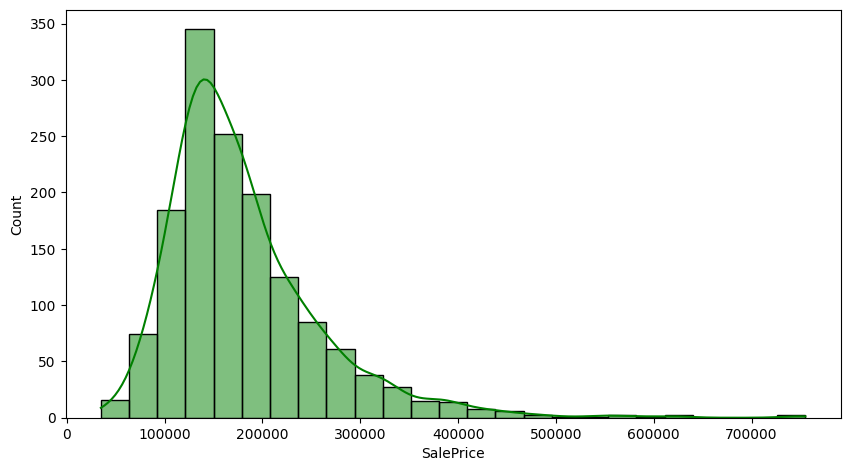

In [14]:
fig = plt.figure(figsize=(10,6))
sns.histplot(y, bins=25,kde=True,color='green')
fig.subplots_adjust(bottom=0.2)

**Distribution plot of Numerical Features**

In [15]:
## Numerical features distibution
numeric_df = X.select_dtypes(include='number')
numeric_df.dtypes.value_counts()

int64      33
float64     3
Name: count, dtype: int64

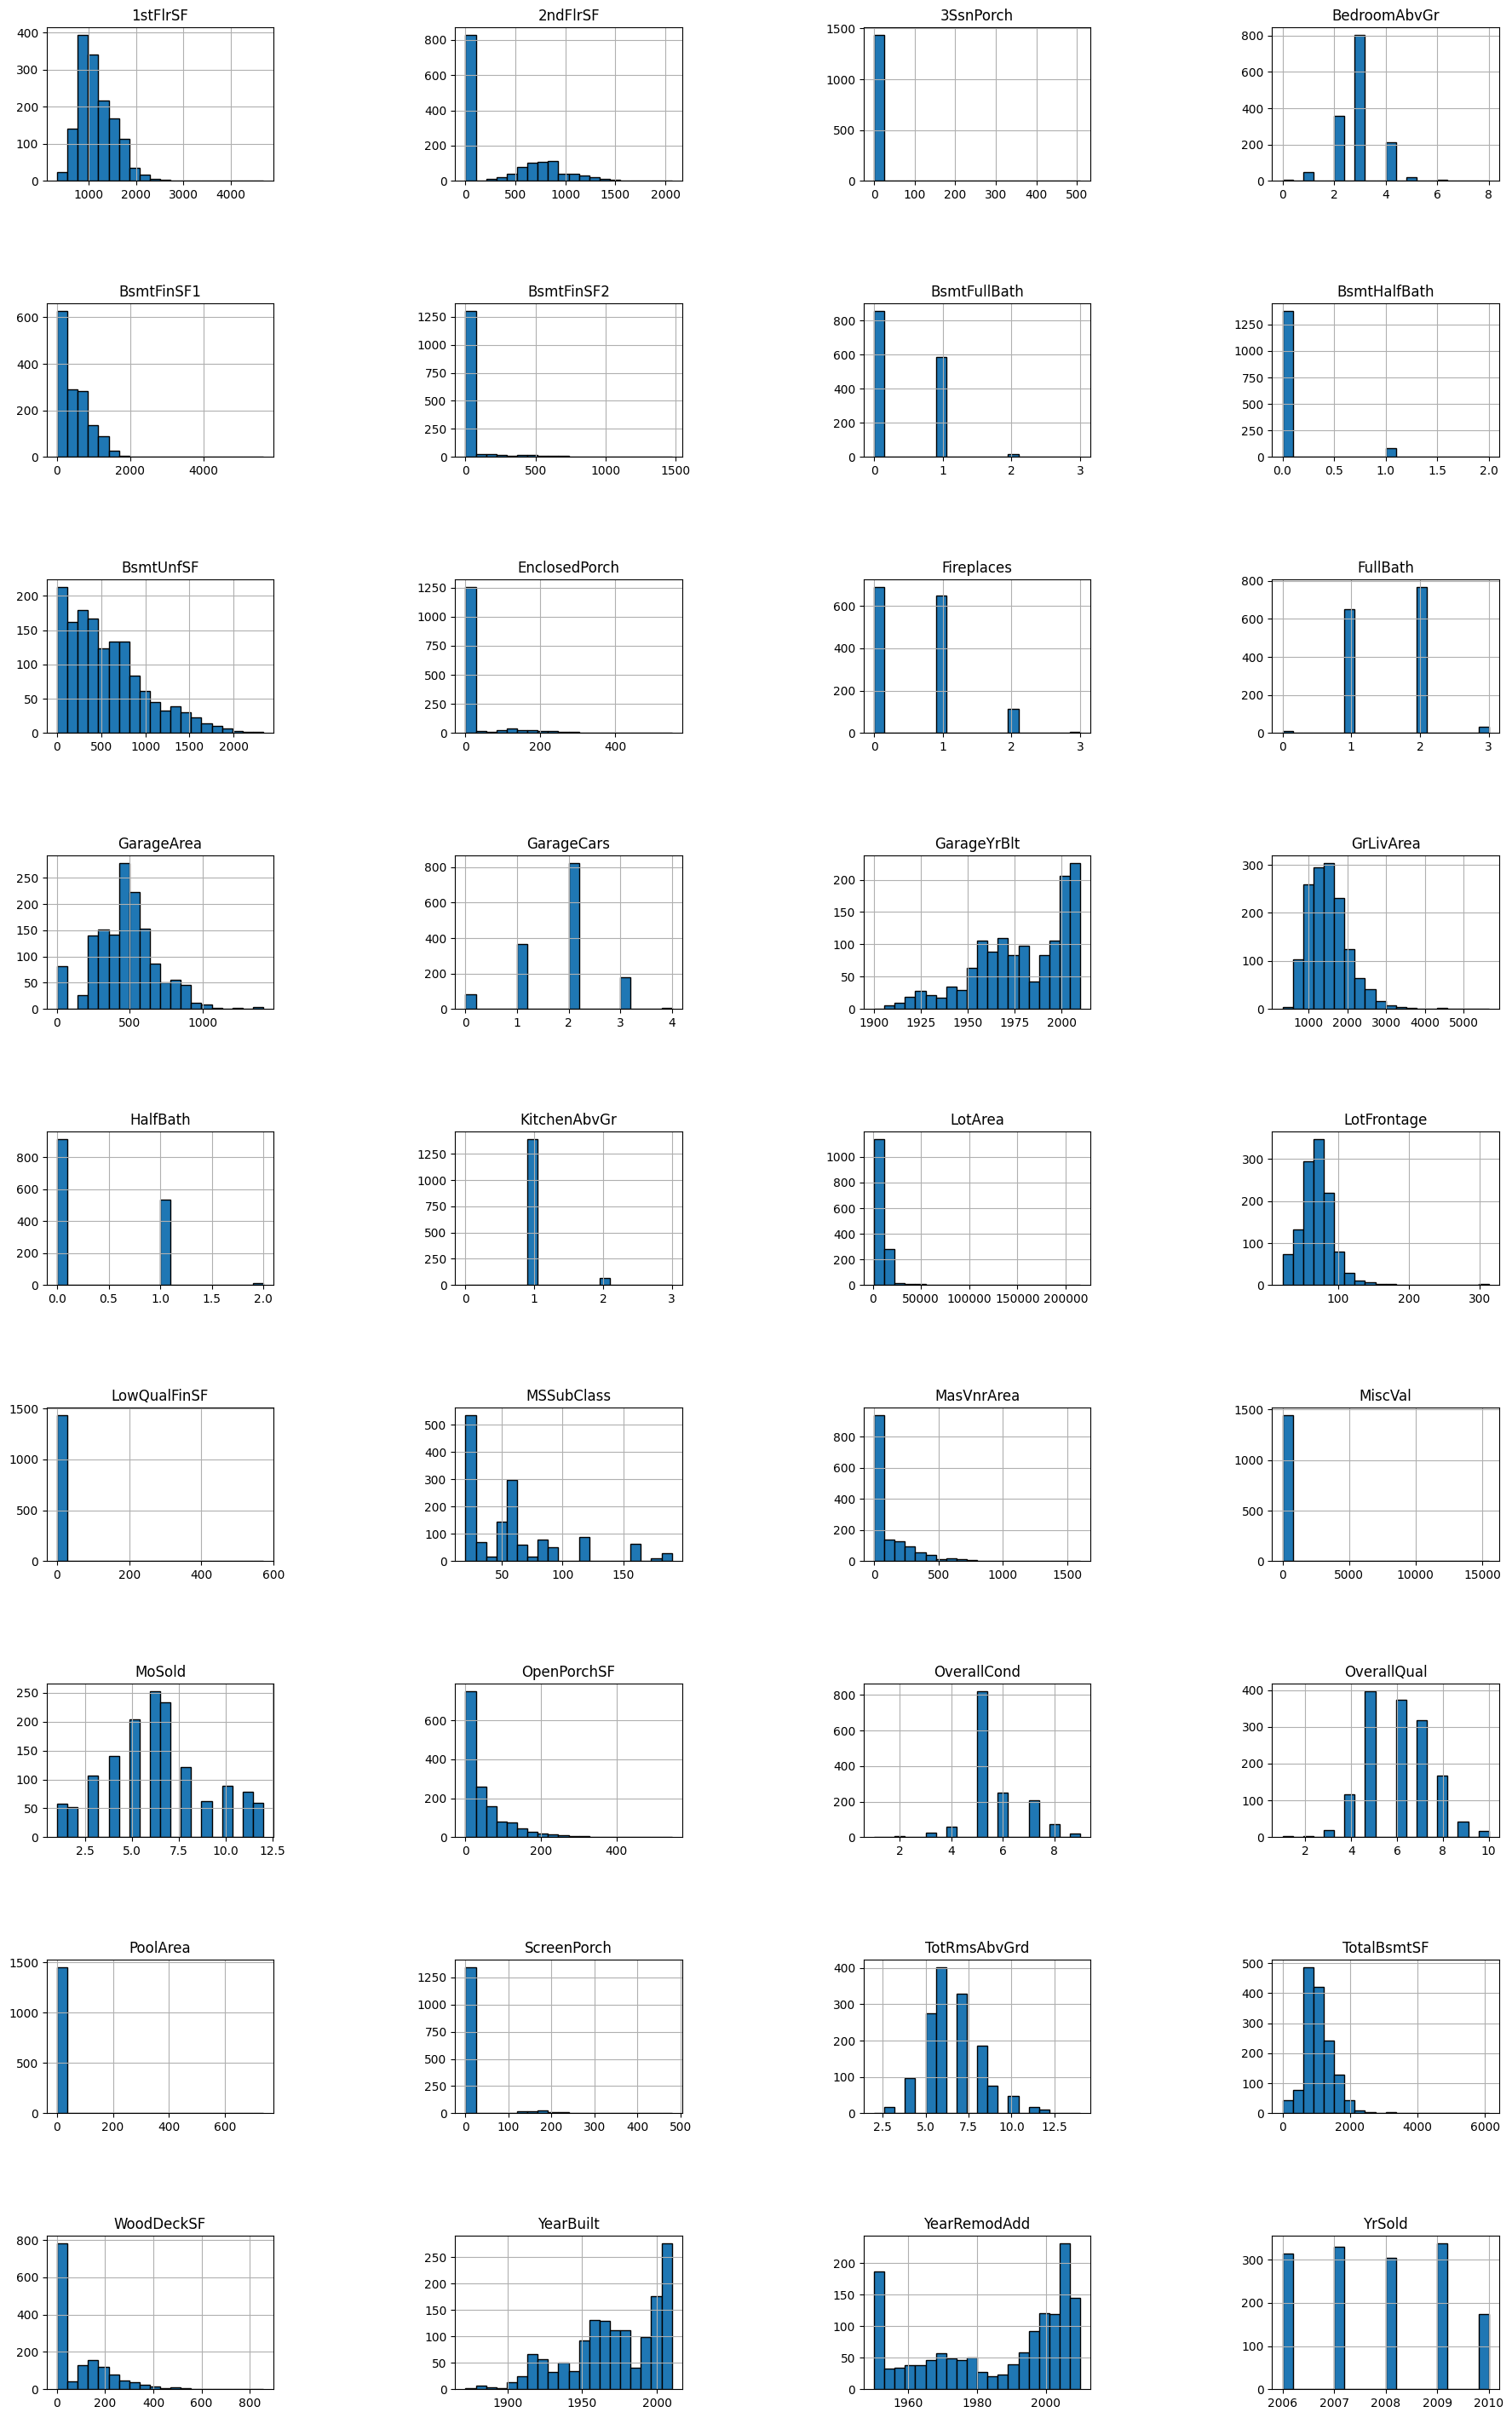

In [16]:
def plot_univariate_numerical_features(df:pd.DataFrame,nrows:int=9, ncol: int=4, figsize: tuple=(22,36),bins:int=20) -> None:    
    numeric_df = df.select_dtypes(include='number')
    numeric_df.hist(bins=bins, figsize=figsize,edgecolor='black',layout=(nrows,ncol))
    plt.subplots_adjust(hspace=0.8,wspace=0.8)



plot_univariate_numerical_features(X)

**Scatter plot for Numerical Features vs Salesprice**

In [17]:
numeric_df.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal',
       'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea',
       'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt',
       'YearRemodAdd', 'YrSold'],
      dtype='object')

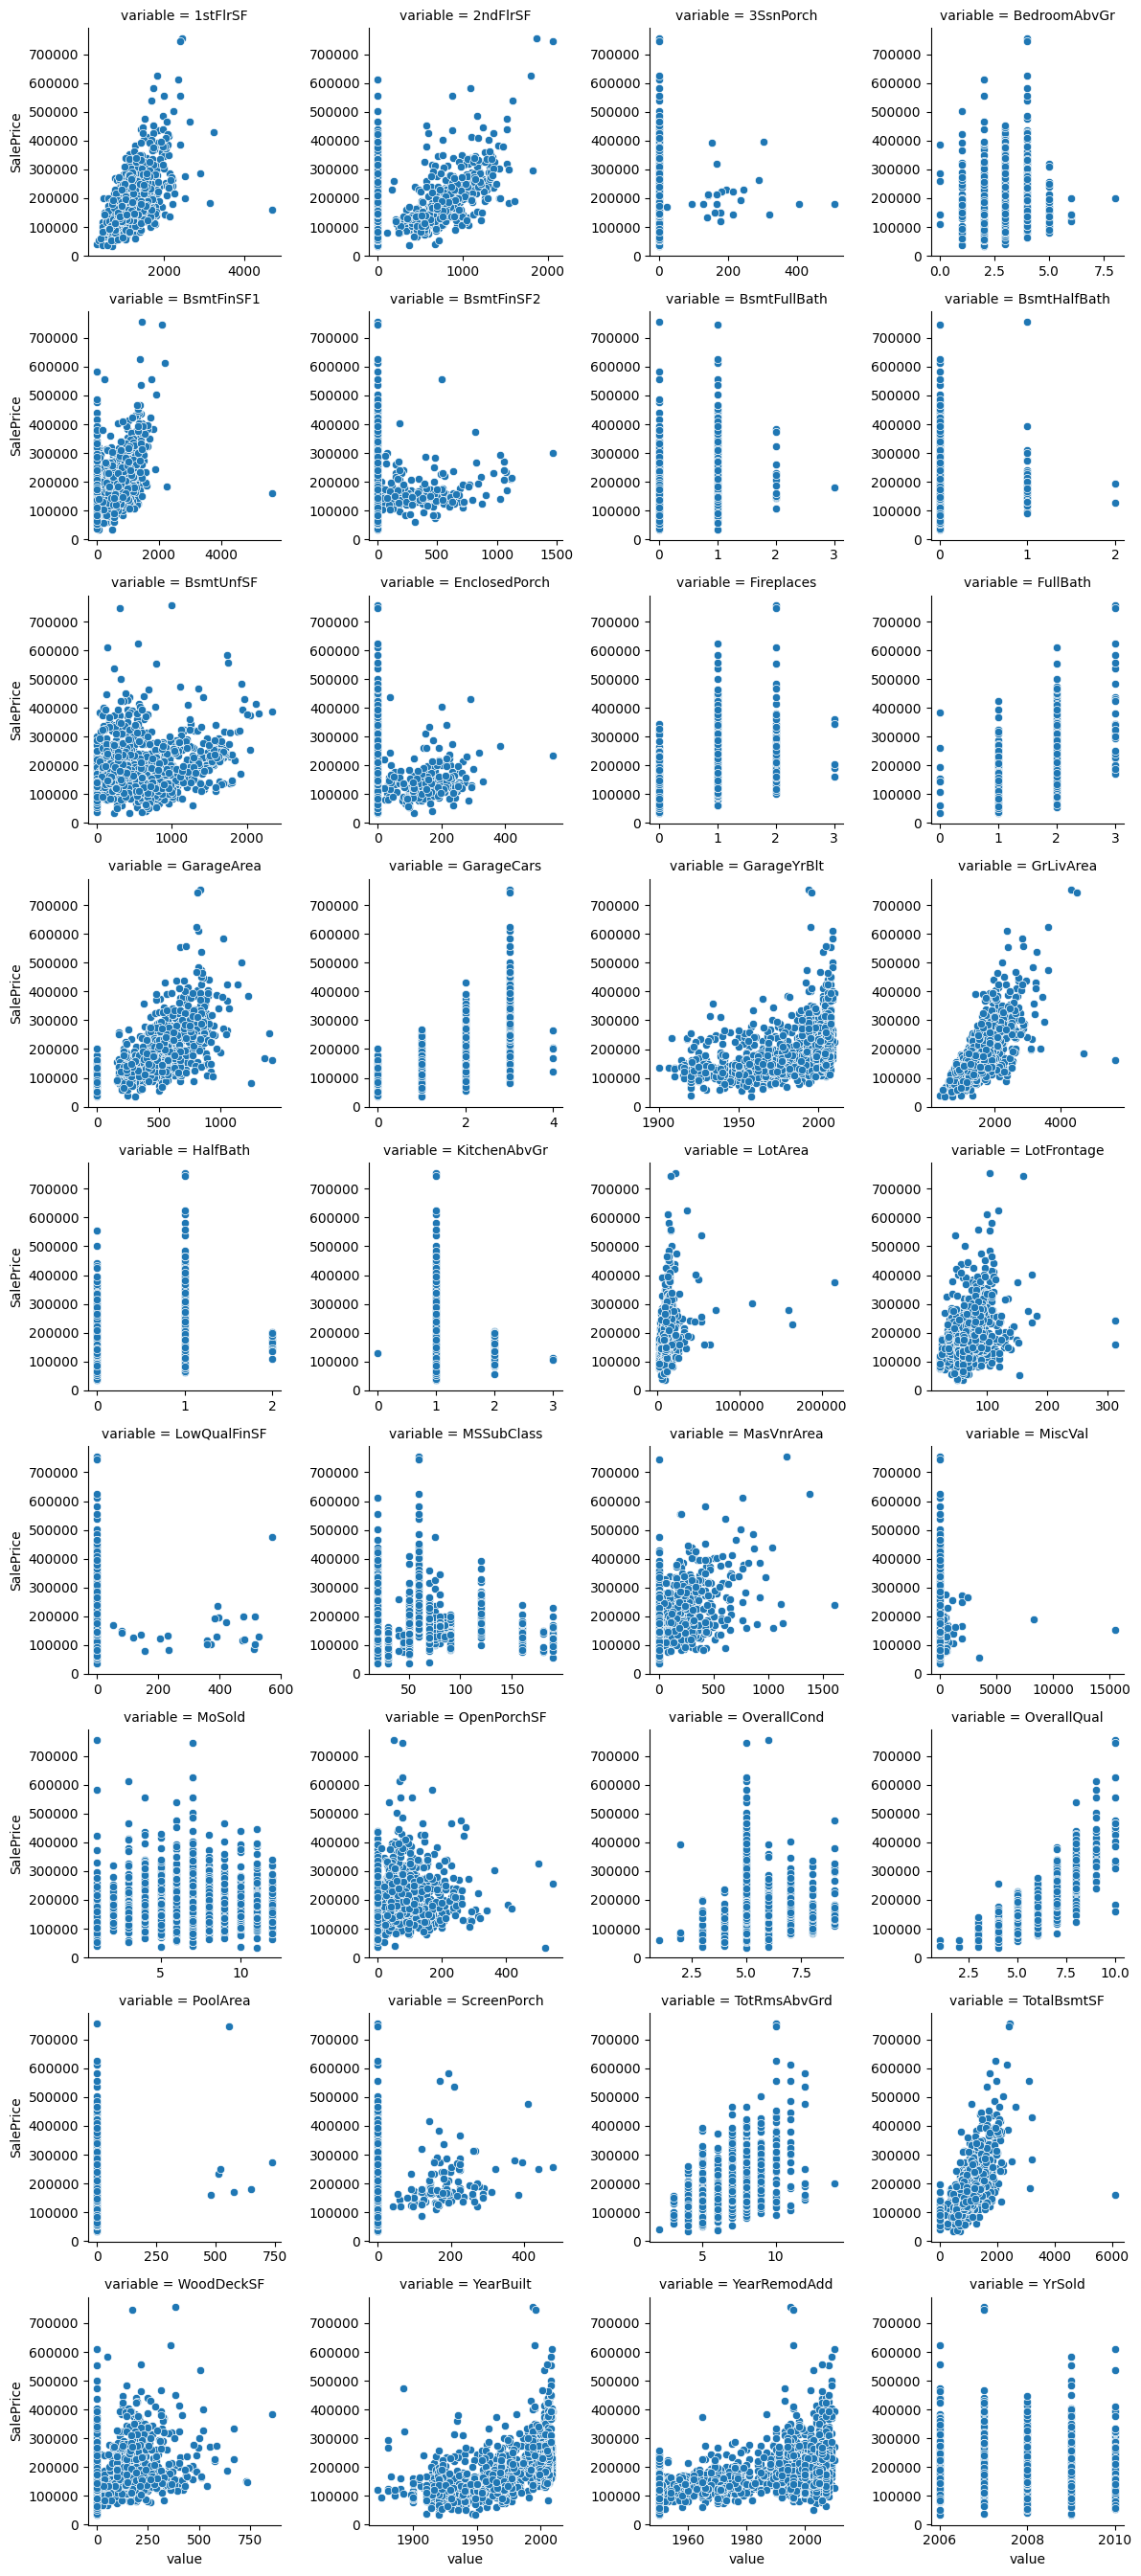

In [18]:
nd = pd.melt(df_train,id_vars='SalePrice',value_vars=numeric_df.columns)
g = sns.FacetGrid(nd, col='variable',col_wrap=4,sharex=False,sharey=False)
n1 = g.map_dataframe(sns.scatterplot,x='value',y='SalePrice')
n1

**Distibution of Categorical dimensions**

In [19]:
cat_df = X.select_dtypes(exclude='number')
cat_df.dtypes.value_counts()

object    43
Name: count, dtype: int64

In [20]:
 def plot_categorical_dimensions(df:pd.DataFrame) -> None:  
    cat_df = df.select_dtypes(include='object')
    nd_cat = pd.melt(cat_df, value_vars=cat_df.columns)
    fig = plt.figure(figsize=(10,6))
    n2 = sns.FacetGrid(nd_cat, col='variable',col_wrap=4,sharex=False,sharey=False)
    n2 = n2.map_dataframe(sns.countplot, 'value')
    n2.set_xticklabels(rotation=60)
    fig.subplots_adjust(bottom=0.3)
    n2.tight_layout()
 


<Figure size 1000x600 with 0 Axes>

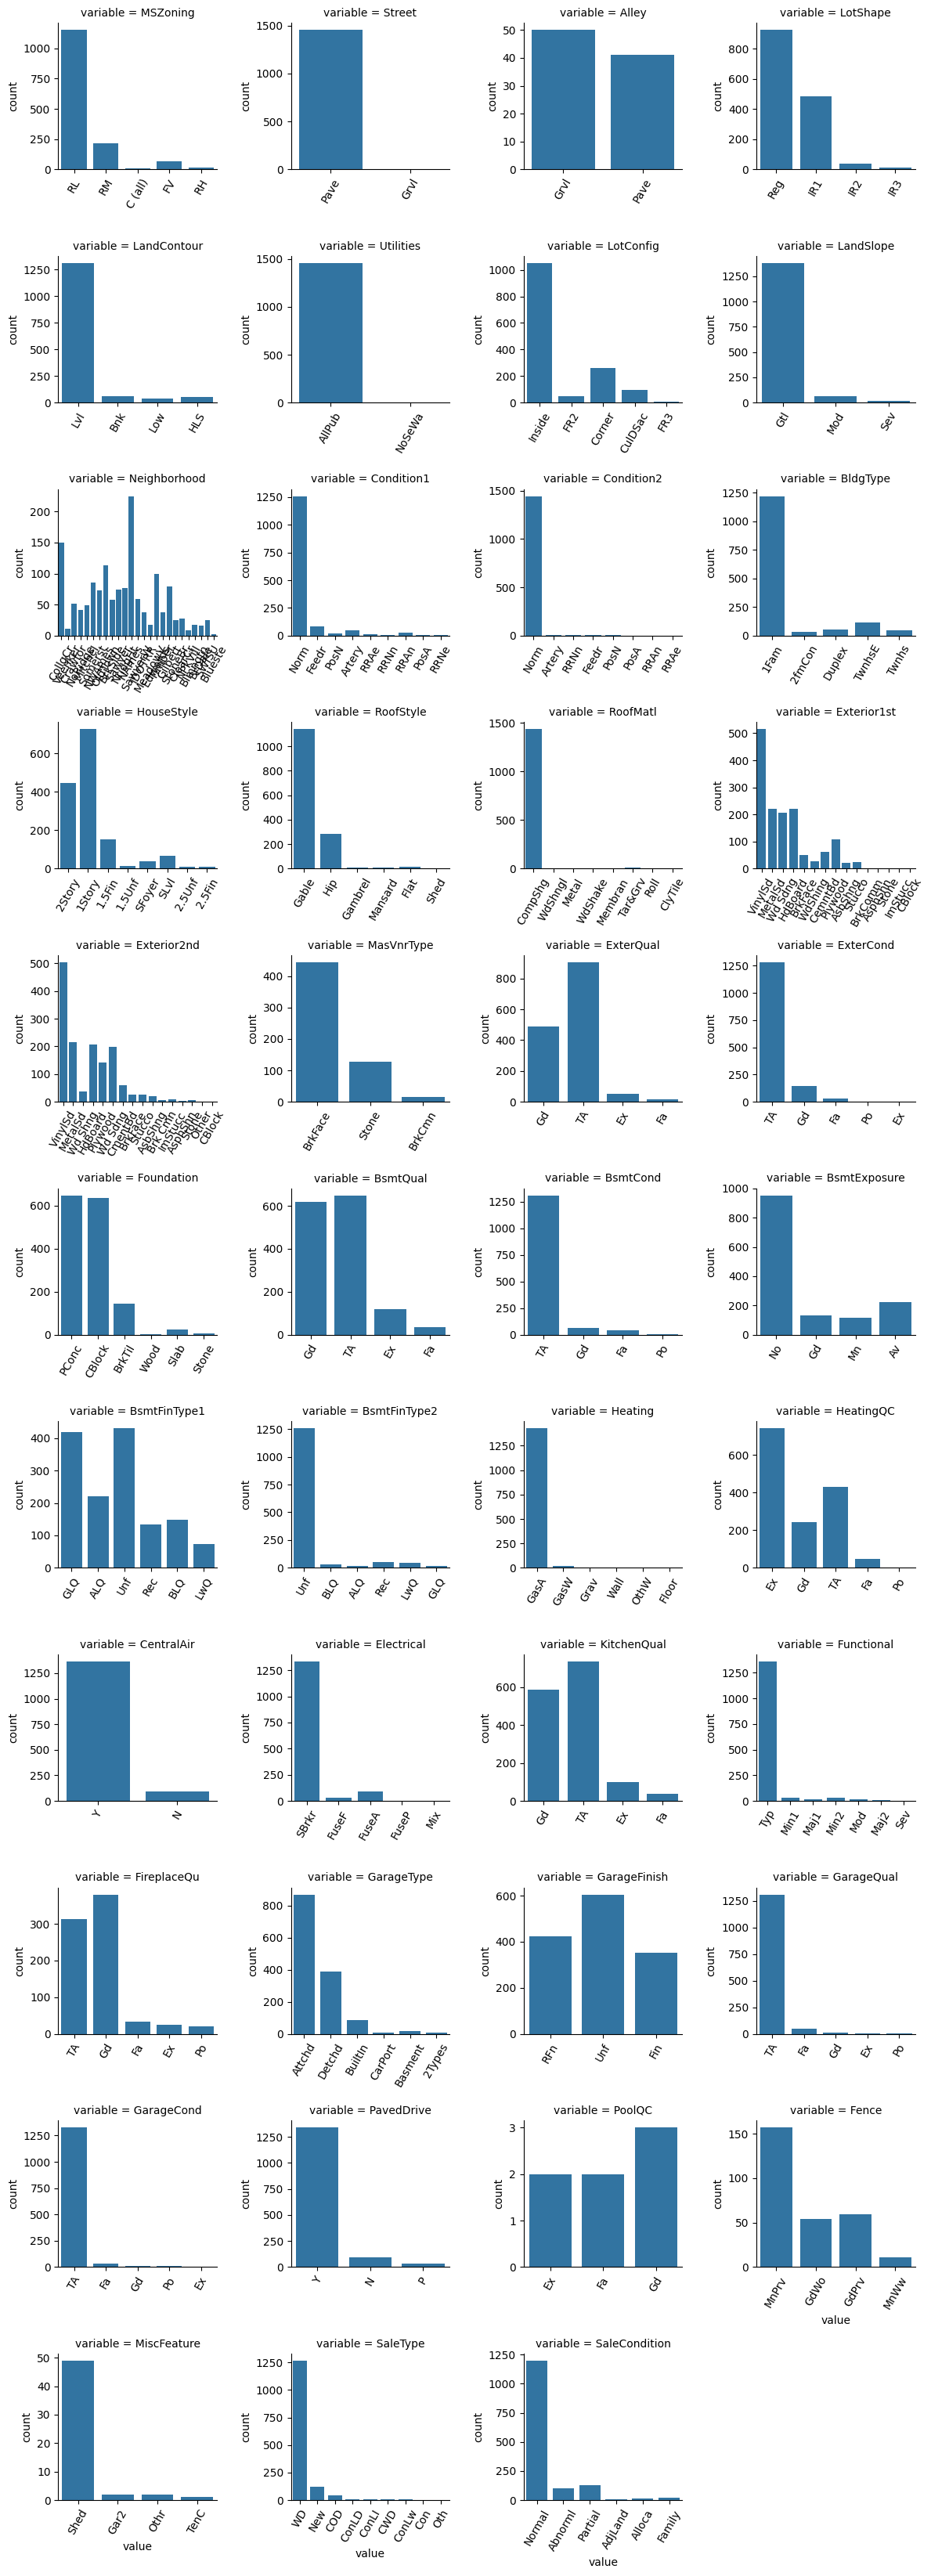

In [21]:
plot_categorical_dimensions(df_train)

**Box plot for categorical dimensions vs Saleprice**

<Figure size 1000x400 with 0 Axes>

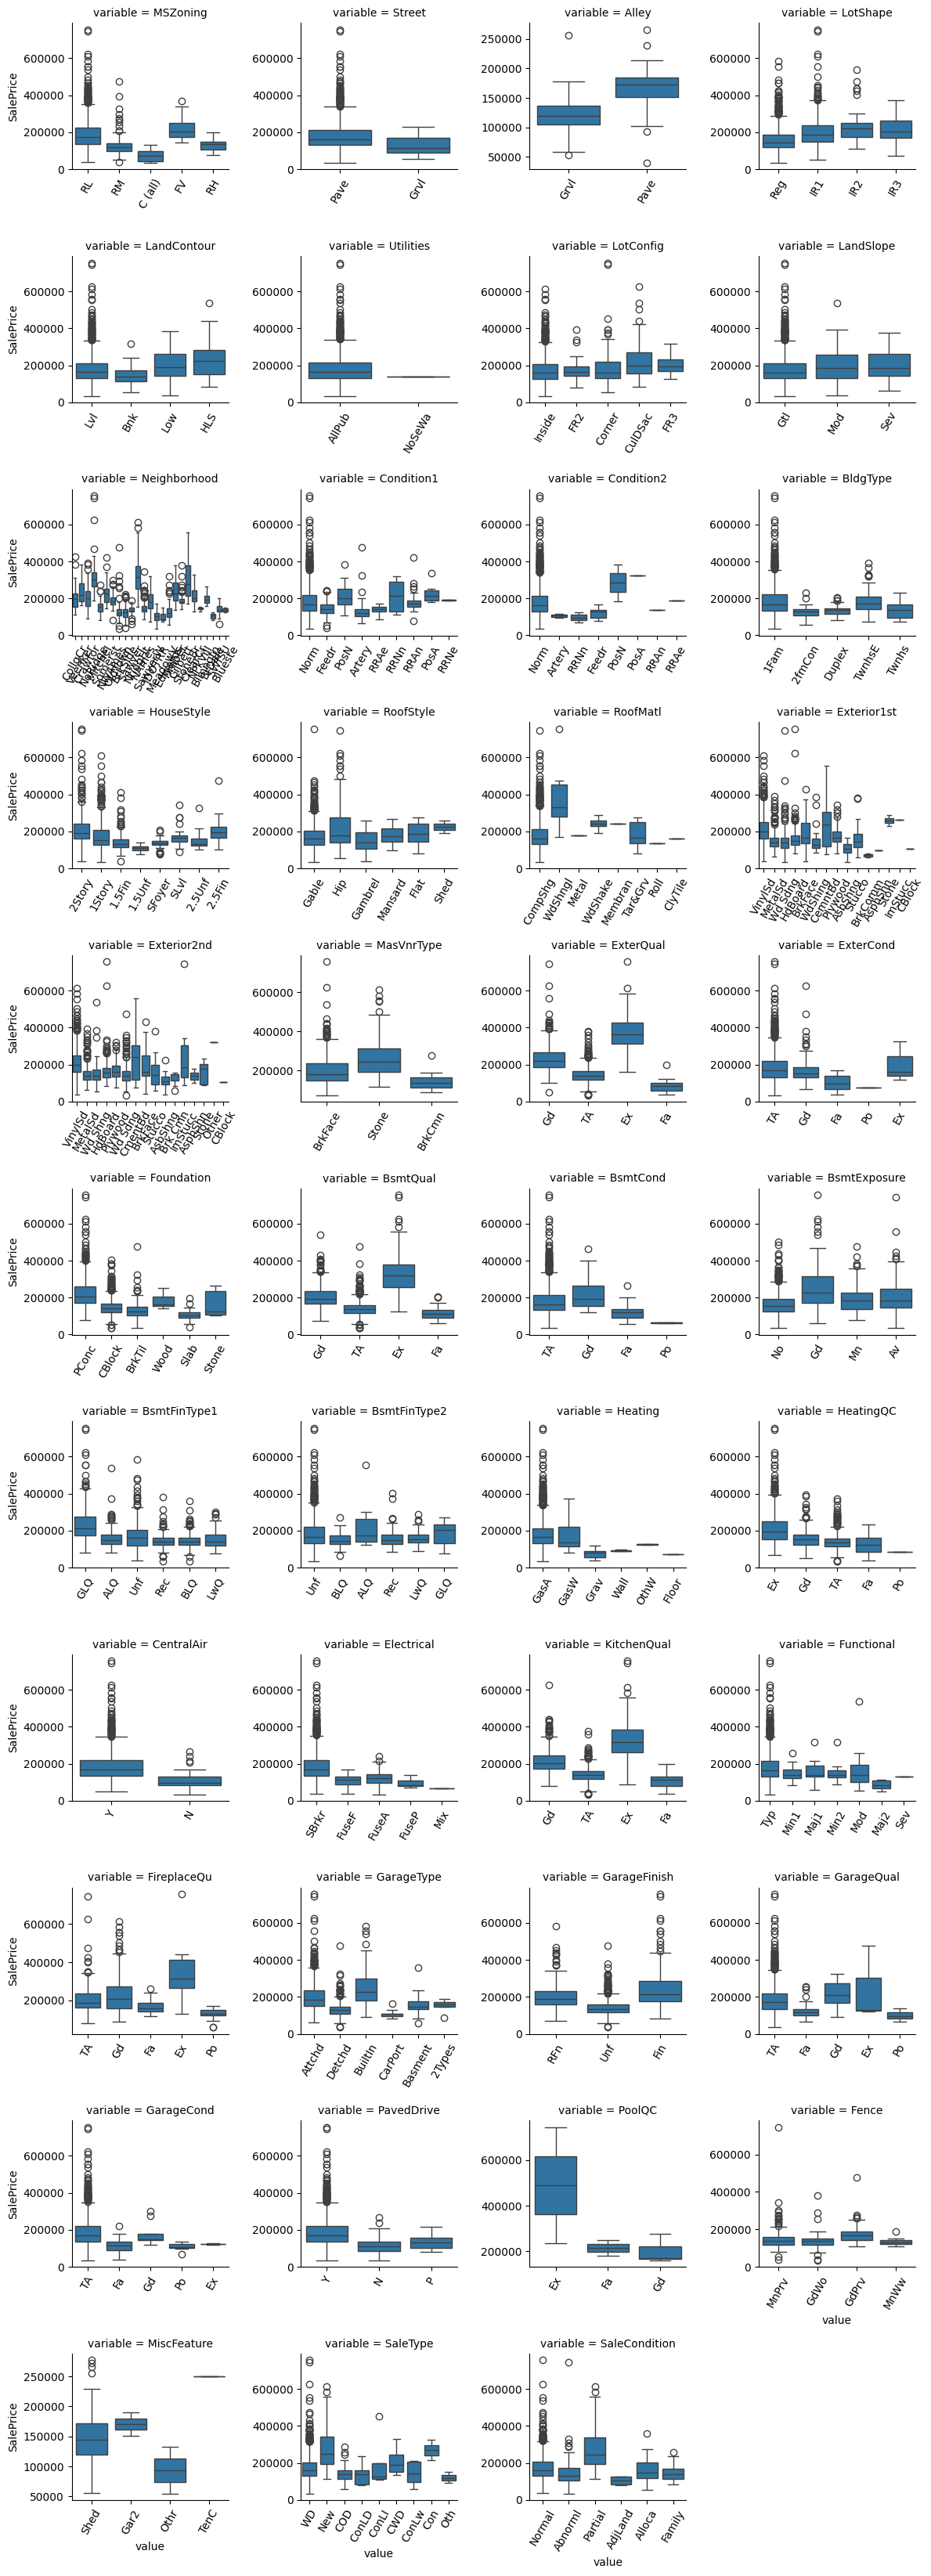

In [22]:
cat_df = df_train.select_dtypes(include='object')
cat_nd = pd.melt(df_train,id_vars='SalePrice',value_vars=cat_df.columns)
fig = plt.figure(figsize=(10,4))
n3 = sns.FacetGrid(cat_nd,col='variable',col_wrap=4, sharex=False,sharey=False)
n3 = n3.map_dataframe(sns.boxplot,'value','SalePrice')
n3.set_xticklabels(rotation=60)
fig.subplots_adjust(bottom=0.3)
n3.tight_layout()


**Number of property sold By Month and Year**

In [23]:
df_train.columns[(df_train.columns.str.contains(pat='mo',case=False) | df_train.columns.str.contains(pat='yr',case=False))]

Index(['YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold'], dtype='object')

In [24]:
df_train[['YearRemodAdd', 'GarageYrBlt', 'MoSold', 'YrSold']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   YearRemodAdd  1460 non-null   int64  
 1   GarageYrBlt   1379 non-null   float64
 2   MoSold        1460 non-null   int64  
 3   YrSold        1460 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 45.8 KB


In [25]:
date_df = pd.crosstab(numeric_df['MoSold'],numeric_df['YrSold'])
date_df.style.highlight_max(axis='index',color='blue').highlight_min(axis='index',color='red')

YrSold,2006,2007,2008,2009,2010
MoSold,,,,,
1,10,13,13,12,10
2,9,8,10,10,15
3,25,23,18,19,21
4,27,23,26,26,39
5,38,43,38,37,48
6,48,59,51,59,36
7,67,51,49,61,6
8,23,40,29,30,0
9,15,11,17,20,0


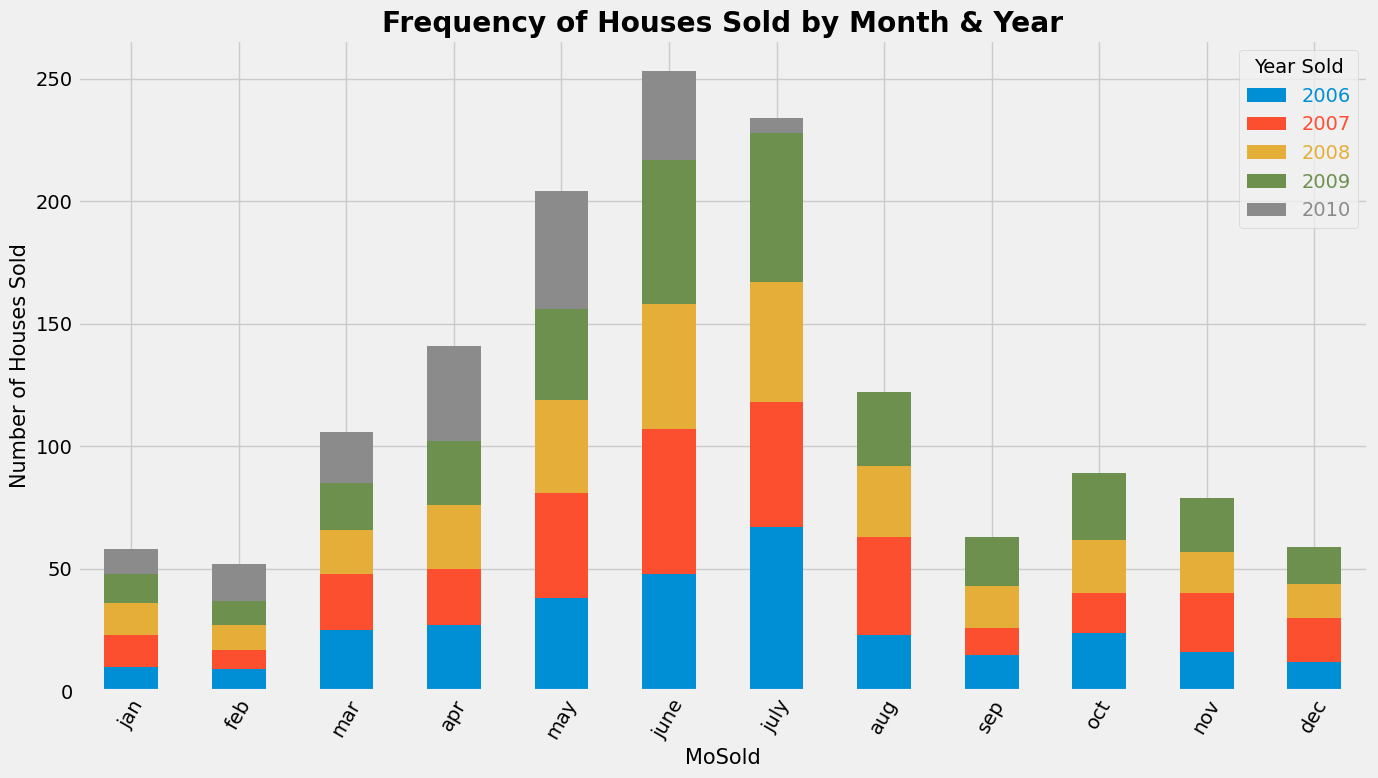

In [26]:
plt.style.use('fivethirtyeight')
date_df.plot(kind='bar',stacked=True,figsize=(14,8))
plt.gca().set_xticks(ticks=np.arange(0,12,1),labels=['jan','feb','mar','apr','may','june','july','aug','sep','oct','nov','dec'],rotation=60)
plt.title('Frequency of Houses Sold by Month & Year',fontweight='bold',loc='center')
plt.ylabel('Number of Houses Sold',fontsize=15)
plt.xlabel('MoSold',fontsize=15)
plt.legend(labelcolor='linecolor',title='Year Sold')
plt.tight_layout()
plt.show()

**SalePrice Behaviour accross Months and Years**

In [27]:
sale_df = pd.pivot_table(data=df_train,index='MoSold',columns='YrSold',values='SalePrice',fill_value=0)
sale_df.style.highlight_max(axis='index',color='blue').highlight_min(axis='index',color='red').format(precision=2)

YrSold,2006,2007,2008,2009,2010
MoSold,,,,,
1,201090.00,183234.62,178504.69,189735.50,163852.60
2,194322.22,176301.75,159370.00,187450.00,174823.33
3,184982.20,176567.78,178505.28,171547.37,203181.29
4,174312.81,170772.61,159293.35,181680.77,171344.03
5,158928.29,169873.51,188334.47,164482.95,178422.25
6,172283.33,179725.81,169730.94,183260.93,181639.58
7,183211.06,195396.84,174562.65,197984.41,121750.00
8,196239.96,183941.08,196076.97,165670.97,0.00
9,223768.87,195533.82,169626.47,196849.35,0.00


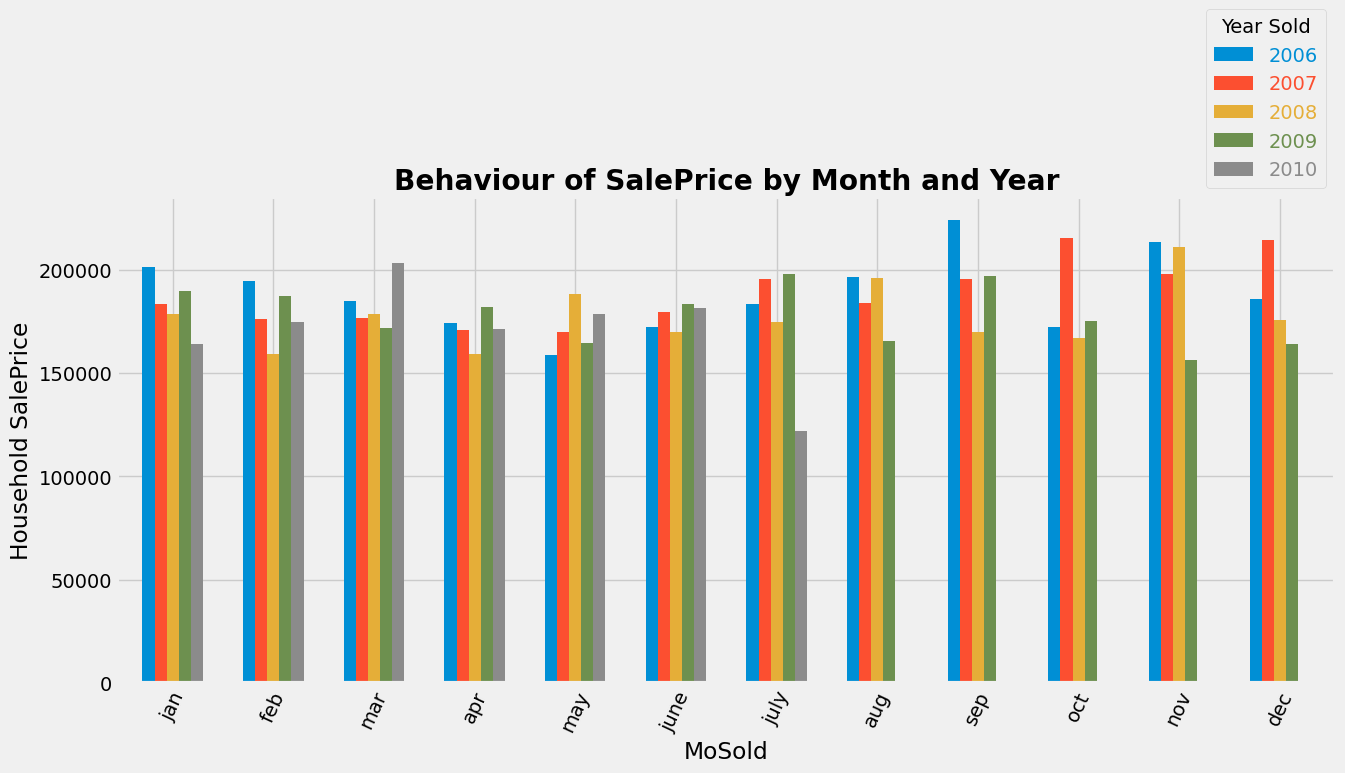

In [28]:
sale_df.plot(kind='bar',width=0.6,figsize=(14,6))
plt.xticks(ticks=np.arange(0,12,1),labels=['jan','feb','mar','apr','may','june','july','aug','sep','oct','nov','dec'],rotation=65)
plt.ylabel('Household SalePrice')
plt.title('Behaviour of SalePrice by Month and Year',fontweight='bold')
plt.legend(loc='lower right',bbox_to_anchor = (1,1),title='Year Sold',labelcolor='linecolor')
plt.show()

**Check Duplicates**

In [29]:
X.duplicated().sum()

np.int64(0)

In [30]:
df_test.duplicated().sum()

np.int64(0)

**Outliers in columns before Missing value Imputation**

In [31]:
"""
Calculate the percentage of outliers based on winsorization method for all the numerical features in the DataFrame.

Parameters:
df(pd.DataFrame): The input DataFrame containing numerical features.
lower_percentile(float): The lower percentile foe winsorization. Default is 5.
upper_percentile(float): The upper percentile for winsorization. Default is 95.

Returns:
pd.DataFrame : A DataFrame containing the columns name and percentage of outliers for each numerical features.
"""

numeric_df = X.select_dtypes(include='number').columns
outliers_percentages = {}
for col in numeric_df:
    x_low, x_high = np.percentile(X[col].dropna(),[1,99])
    total_values = len(X[col])
    outliers = len(X[~X[col].between(x_low,x_high)])
    outliers_percentage = round((outliers / total_values)*100 , 2)
    outliers_percentages[col] = outliers_percentage
    
outliers_df = pd.DataFrame(list(outliers_percentages.items()), columns=['Features','Outliers Percentage'])
print(outliers_df.sort_values(by='Outliers Percentage', ascending=False).reset_index(drop=True))



         Features  Outliers Percentage
0     LotFrontage                18.56
1     GarageYrBlt                 6.44
2       GrLivArea                 2.05
3        1stFlrSF                 1.85
4      MasVnrArea                 1.58
5         LotArea                 1.51
6       YearBuilt                 1.10
7        2ndFlrSF                 1.03
8      GarageArea                 1.03
9     ScreenPorch                 1.03
10     BsmtFinSF1                 1.03
11     BsmtFinSF2                 1.03
12    OpenPorchSF                 1.03
13      BsmtUnfSF                 1.03
14     WoodDeckSF                 1.03
15    TotalBsmtSF                 1.03
16  EnclosedPorch                 1.03
17   BedroomAbvGr                 0.96
18   LowQualFinSF                 0.96
19        MiscVal                 0.96
20      3SsnPorch                 0.89
21   TotRmsAbvGrd                 0.89
22       HalfBath                 0.82
23       FullBath                 0.62
24       PoolArea        

## Missing Value Analysis and Treatment

In [32]:
   def plot_null_counts(df: pd.DataFrame, top_n: int = 15) -> pd.DataFrame: 
    null_info = df.stb.missing().reset_index().rename({'index':'Features'},axis='columns').sort_values(by='percent',ascending=False)
    null_info['columns_dtype'] = [df[col].dtype for col in null_info['Features']]

    null_info = null_info.loc[null_info['missing']>0].head(top_n)
    print(null_info)

    plt.figure(figsize=(8,6))
    sns.barplot(x='percent', y='Features',data=null_info)
    plt.title('Top Features with Highest Percentage of Null Values')
    plt.xlabel('% Null Values')
    plt.ylabel('Features')
    plt.tight_layout()
    plt.show()
    return

        Features  missing  total    percent columns_dtype
0         PoolQC     1453   1460  99.520548        object
1    MiscFeature     1406   1460  96.301370        object
2          Alley     1369   1460  93.767123        object
3          Fence     1179   1460  80.753425        object
4     MasVnrType      872   1460  59.726027        object
5    FireplaceQu      690   1460  47.260274        object
6    LotFrontage      259   1460  17.739726       float64
7     GarageQual       81   1460   5.547945        object
8   GarageFinish       81   1460   5.547945        object
9     GarageType       81   1460   5.547945        object
10   GarageYrBlt       81   1460   5.547945       float64
11    GarageCond       81   1460   5.547945        object
12  BsmtFinType2       38   1460   2.602740        object
13  BsmtExposure       38   1460   2.602740        object
14      BsmtCond       37   1460   2.534247        object


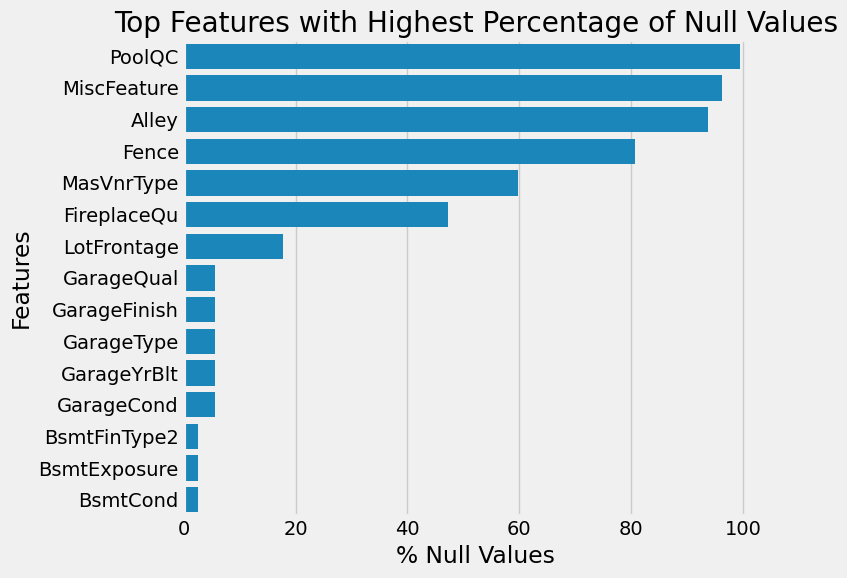

In [33]:
plot_null_counts(df_train)

**Most(>50%) missing values are of categorical features.**

In [34]:
"""
Fill missing  values in DataFrame for both categorical and numerical features based on particular rules.

Parameters:
    df(pd.DataFrame): The input DataFrame with missing values.
    cat_threshold(float): The threshold for handling missing values in categorical features.

Returns:
    pd.DataFrame 
    A dataframe with no missing values.

Rules for missing values:
1. Categorical Featues:
    - if missing values are less than threshold, fill with overall mode value of the column.
    - if greater than threshold, fill with unkown.
2. LotFrontage and GarageYrBlt:
   - Fill using groupby median based on relevent or related columns.
3. Other numeric columns:
   - Fill missing value with the overall missing value of the column.

"""

def fill_missing_values(df:pd.DataFrame, cat_threshold: float = 0.5) -> pd.DataFrame:

    # Make acopy of original DataFrame
    X = df.copy()


    cat_df = df.select_dtypes(include=['object','category'])
    numeric_df = df.select_dtypes(include=['number'])

    # Handle missing values in categorical features
    for col in cat_df.columns:
        if cat_df[col].isnull().sum()/len(cat_df) < cat_threshold:
            df[col].fillna(df[col].mode()[0],inplace=True)
        else:
            df[col].fillna('unknown',inplace=True)
    
    # Handle missing values in numerical features
    # Handle 'LotFrontage' with groupby median imputation
    if 'LotFrontage' in numeric_df.columns:
        df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
        
    # Handle other numeric columns with median imputation
    for col in numeric_df.columns.difference(['LotFrontage']):
        if df[col].isnull().sum()>0:
            df[col] = df[col].fillna(df[col].median())
    return 

In [35]:
fill_missing_values(X)

In [36]:
X.isnull().sum().any().sum() # no missing values in dataframe so missing Analysis and Treatment is done.

np.int64(0)

## Outlier Analysis and Treatment

Lets look at percentage of possible outliers in numerical features. 

In [37]:
"""
Calculate the percentage of outliers based on winsorization method for all the numerical features in the DataFrame.

Parameters:
df(pd.DataFrame): The input DataFrame containing numerical features.
lower_percentile(float): The lower percentile foe winsorization. Default is 5.
upper_percentile(float): The upper percentile for winsorization. Default is 95.

Returns:
pd.DataFrame : A DataFrame containing the columns name and percentage of outliers for each numerical features.
"""
def calculate_outlier_percentage(df:pd.DataFrame, lower_percentile: float=1, upper_percentile: float=99) -> pd.DataFrame:
    
    numeric_df = df.select_dtypes(include='number').columns
    var = []
    outlier = []
    
    #df = X.copy()
    for col in numeric_df:

        x_low, x_high = np.percentile(df[col],[1,99])
        total_values = len(df[col])
        outliers = len(df[~df[col].between(x_low,x_high)])
        outliers_percentage = round((outliers / total_values)*100 , 2)
        var.append(col)
        outlier.append(outliers_percentage)
    
    outliers_df = pd.DataFrame(zip(var, outlier), columns = ['Features', 'Outliers Percentage'])
    return outliers_df

anamoly_df = calculate_outlier_percentage(X)
print(anamoly_df.sort_values(by='Outliers Percentage', ascending=False).reset_index(drop=True))


         Features  Outliers Percentage
0       GrLivArea                 2.05
1        1stFlrSF                 1.85
2         LotArea                 1.51
3     GarageYrBlt                 1.23
4       YearBuilt                 1.10
5     LotFrontage                 1.03
6        2ndFlrSF                 1.03
7     ScreenPorch                 1.03
8      GarageArea                 1.03
9      BsmtFinSF2                 1.03
10  EnclosedPorch                 1.03
11     BsmtFinSF1                 1.03
12    OpenPorchSF                 1.03
13      BsmtUnfSF                 1.03
14     WoodDeckSF                 1.03
15    TotalBsmtSF                 1.03
16     MasVnrArea                 1.03
17   BedroomAbvGr                 0.96
18   LowQualFinSF                 0.96
19        MiscVal                 0.96
20      3SsnPorch                 0.89
21   TotRmsAbvGrd                 0.89
22       HalfBath                 0.82
23       FullBath                 0.62
24       PoolArea        

In [38]:
# Exclude this outliers from the DataFrame
df_new = X[~((X['LotFrontage'] > 300) | (X['LotArea'] > 100000) | (X['GrLivArea'] > 3200) | (X['MasVnrArea'] > 1500) | (X['OpenPorchSF'] > 500))]
df_new.shape


(1438, 79)

In [39]:
X['GrLivArea'].describe(percentiles=[.01,.99])

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
1%        692.180000
50%      1464.000000
99%      3123.480000
max      5642.000000
Name: GrLivArea, dtype: float64

In [40]:
calculate_outlier_percentage(df_new).sort_values(by='Outliers Percentage', ascending=False).reset_index(drop=True)

,Features,Outliers Percentage
0,GrLivArea,2.09
1,1stFlrSF,1.88
2,LotArea,1.53
3,GarageYrBlt,1.25
4,OverallQual,1.11
5,MasVnrArea,1.04
6,2ndFlrSF,1.04
7,ScreenPorch,1.04
8,GarageArea,1.04
9,BsmtFinSF2,1.04


# Feature Engineering

**Create New Features**

In [43]:
df_new.select_dtypes(include='number').columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea',
       'LotFrontage', 'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal',
       'MoSold', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PoolArea',
       'ScreenPorch', 'TotRmsAbvGrd', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt',
       'YearRemodAdd', 'YrSold'],
      dtype='object')

In [46]:
df_new['PoolArea'].unique()

array([  0, 512, 648, 576, 519, 738])

In [55]:
df_new.corr(numeric_only=True)[df_new.corr(numeric_only=True)>0.6]

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
1stFlrSF,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.799723,NaN,NaN,NaN,NaN
2ndFlrSF,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.675695,0.618659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3SsnPorch,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BedroomAbvGr,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.669884,NaN,NaN,NaN,NaN,NaN
BsmtFinSF1,NaN,NaN,NaN,NaN,1.00000,NaN,0.65922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFinSF2,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtFullBath,NaN,NaN,NaN,NaN,0.65922,NaN,1.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtHalfBath,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BsmtUnfSF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EnclosedPorch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
